## Affiliative Questionnaire

## Import packages 

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import *

## Function creation

1. reverseScoring: Reserse scores likert scales. It requires three arguments:
    - **df** = your data frame,
    - **high** = 1 + highest score available
    - **cols** = the columns you want reversed in list form

In [19]:
def reverseScoring(df, high, cols):
    '''Reverse scores on given columns
Parameters
-------------
     df: your data frame,
     high: 1 + highest score available
     cols: the columns you want reversed in list form
Returns
------------
     dataFrame '''
    
    df[cols] = 1 + high - df[cols]
    return df

2. indexNans: Gets the row index of Nans cointained in a dataFrame
    - **df**= Your data Frame

In [20]:
def indexNans(df):
    '''Get row index of all Nans in a data frame
Parameters
----------
    df:  Data frame
Returns
-------
    List
'''
    booleanMaskNaNs = df.isna() #Dataframe with boolen of NaNs
    rowsWithNaNs = df[(booleanMaskNaNs == 1).any(axis=1)] # Keeps only rows with NaNs
    index = rowsWithNaNs.index # Gets index of rows with NaNs
    return list(index)

3.dataImputation: Fills in Nan and changes them for the average score of the subject on the scale:
    - **DF** = Data frame for imputation

In [21]:
def Imputation(DF=None):
    '''Replace NaN values with subject average
    Parameters
----------
    df:  Data frame
Returns
-------
    Data frame'''
    index = indexNans(DF)
    for row in DF.iterrows():
        for element in index: 
            DF.loc[element] = DF.loc[element].fillna(round(DF.iloc[element,2:6].mean()))   
    return DF 

## Preprocessing 

In [22]:
# Data set loading
df_file = "//Users/tracysanchezpacheco/OneDrive/PhD/DataAnalysis/DataAnalysis/AffiliativeQuest/AffiliativeQuest.csv"
df = pd.read_csv(df_file, sep= ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               20 non-null     object 
 1   ID                                                      20 non-null     int64  
 2   1. I prefer to work in group instead of by myself ​     20 non-null     int64  
 3   2. I spend a lot of time talking to others              19 non-null     float64
 4   3. I like to study with groups rather than by myself​   20 non-null     int64  
 5   4. I try to work alone ​                                20 non-null     int64  
 6   5. I prefer to work on my own and let others do theirs  20 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.2+ KB


In [23]:
#Renaming the column names 
column_names = ['timeStamp', 'ID', 'item1', 'item2', 'item3', 'item4', 'item5']
df.columns = column_names
df.head()

,timeStamp,ID,item1,item2,item3,item4,item5
0,11/12/2021 16:36:21,8469,3,6.0,2,5,3
1,11/15/2021 15:06:20,7264,1,NaN,1,6,6
2,11/17/2021 13:38:04,3572,5,4.0,3,4,4
3,11/18/2021 12:15:48,365,6,6.0,4,3,3
4,11/30/2021 11:33:24,6642,5,5.0,3,5,3


In [24]:
#Recodifying the negatively phrased items 
reverseScoring(df,7,['item4','item5'])

,timeStamp,ID,item1,item2,item3,item4,item5
0,11/12/2021 16:36:21,8469,3,6.0,2,3,5
1,11/15/2021 15:06:20,7264,1,NaN,1,2,2
2,11/17/2021 13:38:04,3572,5,4.0,3,4,4
3,11/18/2021 12:15:48,365,6,6.0,4,5,5
4,11/30/2021 11:33:24,6642,5,5.0,3,3,5
5,12/3/2021 17:28:48,5741,2,5.0,3,2,2
6,12/10/2021 12:32:44,7842,5,5.0,2,2,3
7,12/15/2021 11:16:55,4176,2,5.0,3,5,2
8,12/22/2021 16:53:24,9472,5,5.0,4,4,5
9,1/18/2022 12:54:26,4623,2,2.0,2,3,2


In [25]:
df1 = Imputation(df)
df1.head()

,timeStamp,ID,item1,item2,item3,item4,item5
0,11/12/2021 16:36:21,8469,3,6.0,2,3,5
1,11/15/2021 15:06:20,7264,1,1.0,1,2,2
2,11/17/2021 13:38:04,3572,5,4.0,3,4,4
3,11/18/2021 12:15:48,365,6,6.0,4,5,5
4,11/30/2021 11:33:24,6642,5,5.0,3,3,5


In [26]:
# Calculating the average for all context items 
df1['AffiliativeQ_average'] = df1[['item1', 'item2', 'item3','item4','item5']].mean(axis=1)
df1.head()

,timeStamp,ID,item1,item2,item3,item4,item5,AffiliativeQ_average
0,11/12/2021 16:36:21,8469,3,6.0,2,3,5,3.8
1,11/15/2021 15:06:20,7264,1,1.0,1,2,2,1.4
2,11/17/2021 13:38:04,3572,5,4.0,3,4,4,4.0
3,11/18/2021 12:15:48,365,6,6.0,4,5,5,5.2
4,11/30/2021 11:33:24,6642,5,5.0,3,3,5,4.2


## Write to CSV

In [27]:
os.chdir('/Users/tracysanchezpacheco/Documents/Resources')
df1.to_csv('AffilliativeTend.csv')

In [28]:
# From a wide format to a long format 
Long = pd.melt(df1, id_vars=['ID'], value_vars=['item1', 'item2', 'item3', 'item4', 'item5', 'AffiliativeQ_average'], var_name='item', value_name='score')
Long.head()

,ID,item,score
0,8469,item1,3.0
1,7264,item1,1.0
2,3572,item1,5.0
3,365,item1,6.0
4,6642,item1,5.0


## Data Visualization

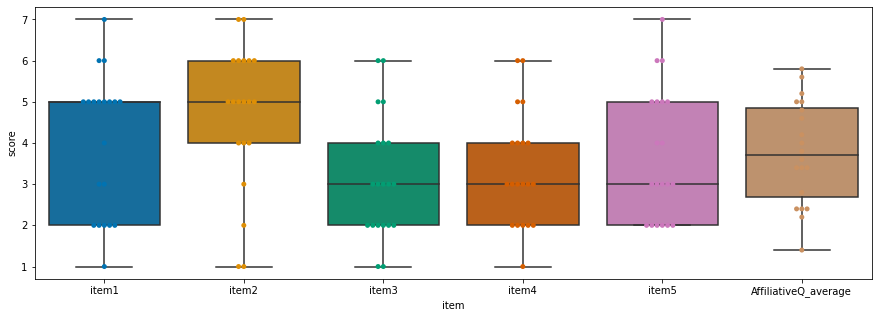

In [29]:
sns.set_palette('colorblind')
dy='item'; dx='score'; data=Long
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data= data, x=dy, y=dx, ax=ax)
sns.swarmplot(data= data, x=dy, y=dx, ax=ax)
plt.show()


In [30]:
data.describe()

,ID,score
count,120.000000,120.000
mean,5721.050000,3.770
std,2520.796202,1.586
min,365.000000,1.000
25%,4126.000000,2.150
50%,5636.000000,4.000
75%,7519.500000,5.000
max,9502.000000,7.000


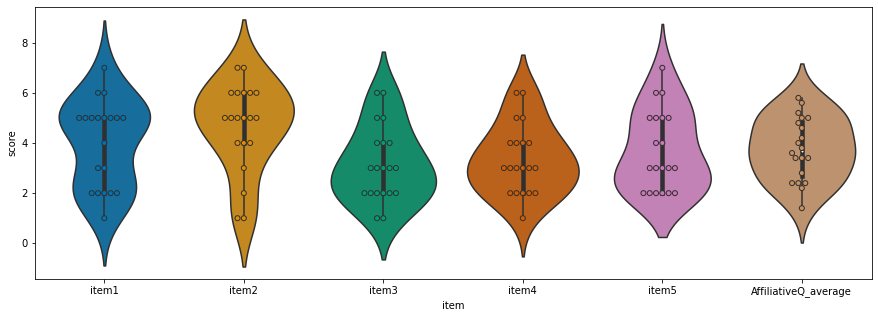

In [31]:
fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(data= Long, x=dy, y=dx, ax=ax)
sns.swarmplot(data= Long, x=dy, y=dx,  ax=ax, linewidth=1)

plt.show()